<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/google-Colab/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing the libraries
import math
import scipy
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


In [0]:
QQQ = yf.download('qqq',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])
SPX = yf.download('spy',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])
SPXL = yf.download('SPXL',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])
GDX = yf.download('GDX',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])


df = pd.DataFrame({
    'SPX':SPX.Close,
    'SPX_MA_3':SPX.Close.rolling(window=3).mean(),
     'SPX_shift_3':SPX.Close.shift(periods= 3),
    
    'SPXL':SPXL.Close,
    'QQQ':QQQ.Close,
    'TQQQ':yf.download('TQQQ',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'GDX':GDX.Close,
    'GLD':yf.download('GLD',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close,
    'GOLD':yf.download('XAU',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume']).Close
})

df = df.dropna()

df.head()



[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
Date,,,,,,,,,
2013-02-26,150.020004,150.303334,150.419998,8.460000,66.559998,4.550833,39.049999,156.220001,0.13
2013-02-27,151.910004,150.310003,151.889999,8.773334,67.239998,4.689167,38.259998,154.570007,0.13
2013-02-28,151.610001,151.180003,149.000000,8.700000,67.099998,4.671667,37.400002,153.000000,0.13
2013-03-01,152.110001,151.876669,150.020004,8.818334,67.379997,4.720000,37.110001,152.440002,0.13
2013-03-04,152.919998,152.213333,151.910004,8.949166,67.680000,4.780833,35.910000,152.300003,0.10


In [0]:
mse = mean_squared_error(df.SPX, df.QQQ)
mse

9758.608698251202

In [0]:
norm_df=(df-df.min())/(df.max()-df.min())
norm_df.head()

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
Date,,,,,,,,,
2013-02-26,0.000000,0.000000,0.010573,0.000000,0.000000,0.000000,1.000000,0.999453,0.006984
2013-02-27,0.013840,0.000050,0.021519,0.006809,0.006515,0.002465,0.970278,0.969360,0.006984
2013-02-28,0.011643,0.006516,0.000000,0.005215,0.005174,0.002153,0.937923,0.940726,0.006984
2013-03-01,0.015305,0.011693,0.007595,0.007786,0.007857,0.003015,0.927013,0.930513,0.006984
2013-03-04,0.021236,0.014195,0.021668,0.010629,0.010731,0.004099,0.881866,0.927959,0.003175


In [0]:
mse = mean_squared_error(norm_df.SPX, norm_df.GLD)
mse

0.11123244315793719

In [0]:
def get_mse_df(df=df):
  Matrix = [[round(mean_squared_error(df.iloc[:, row],df.iloc[:, col]),6) for row in range(df.columns.size)] for col in range(df.columns.size)] 
  cols = df.columns

  mse_df = pd.DataFrame(Matrix, columns=cols, index=cols)
  return mse_df

mse_df=get_mse_df(norm_df)
mse_df

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
SPX,0.000000,0.000077,0.000455,0.011680,0.001329,0.025578,0.102667,0.111232,0.048699
SPX_MA_3,0.000077,0.000000,0.000243,0.012482,0.001358,0.026658,0.104462,0.113378,0.049331
SPX_shift_3,0.000455,0.000243,0.000000,0.014676,0.001927,0.029639,0.104974,0.114514,0.051065
SPXL,0.011680,0.012482,0.014676,0.000000,0.010130,0.003093,0.100835,0.099324,0.041748
QQQ,0.001329,0.001358,0.001927,0.010130,0.000000,0.021252,0.114938,0.121680,0.043342
TQQQ,0.025578,0.026658,0.029639,0.003093,0.021252,0.000000,0.113725,0.106553,0.044142
GDX,0.102667,0.104462,0.104974,0.100835,0.114938,0.113725,0.000000,0.005406,0.152939
GLD,0.111232,0.113378,0.114514,0.099324,0.121680,0.106553,0.005406,0.000000,0.152822
GOLD,0.048699,0.049331,0.051065,0.041748,0.043342,0.044142,0.152939,0.152822,0.000000


In [0]:
norm_df.corr()

,SPX,SPX_MA_3,SPX_shift_3,SPXL,QQQ,TQQQ,GDX,GLD,GOLD
SPX,1.000000,0.999417,0.996906,0.988330,0.993280,0.969431,-0.288655,-0.394475,0.728615
SPX_MA_3,0.999417,1.000000,0.998349,0.987546,0.993124,0.968876,-0.289975,-0.395988,0.729595
SPX_shift_3,0.996906,0.998349,1.000000,0.984383,0.991680,0.966254,-0.295113,-0.400761,0.731198
SPXL,0.988330,0.987546,0.984383,1.000000,0.983047,0.991467,-0.230716,-0.310717,0.692597
QQQ,0.993280,0.993124,0.991680,0.983047,1.000000,0.976702,-0.307834,-0.398970,0.752597
TQQQ,0.969431,0.968876,0.966254,0.991467,0.976702,1.000000,-0.229470,-0.281733,0.690702
GDX,-0.288655,-0.289975,-0.295113,-0.230716,-0.307834,-0.229470,1.000000,0.934826,-0.335085
GLD,-0.394475,-0.395988,-0.400761,-0.310717,-0.398970,-0.281733,0.934826,1.000000,-0.414332
GOLD,0.728615,0.729595,0.731198,0.692597,0.752597,0.690702,-0.335085,-0.414332,1.000000


In [0]:
from statsmodels.tsa.stattools import grangercausalitytests

In [0]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPX_MA_3']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0028  , p=0.9575  , df_denom=1004, df_num=1
ssr based chi2 test:   chi2=0.0029  , p=0.9574  , df=1
likelihood ratio test: chi2=0.0029  , p=0.9574  , df=1
parameter F test:         F=0.0028  , p=0.9575  , df_denom=1004, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6852  , p=0.5042  , df_denom=1001, df_num=2
ssr based chi2 test:   chi2=1.3772  , p=0.5023  , df=2
likelihood ratio test: chi2=1.3763  , p=0.5025  , df=2
parameter F test:         F=0.6852  , p=0.5042  , df_denom=1001, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3482  , p=0.0712  , df_denom=998, df_num=3
ssr based chi2 test:   chi2=7.0942  , p=0.0690  , df=3
likelihood ratio test: chi2=7.0692  , p=0.0697  , df=3
parameter F test:         F=2.3482  , p=0.0712  , df_denom=998, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5887  , p=0.17

In [0]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPX_shift_3']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0221  , p=0.8818  , df_denom=1004, df_num=1
ssr based chi2 test:   chi2=0.0222  , p=0.8816  , df=1
likelihood ratio test: chi2=0.0222  , p=0.8816  , df=1
parameter F test:         F=0.0221  , p=0.8818  , df_denom=1004, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.2319  , p=0.0055  , df_denom=1001, df_num=2
ssr based chi2 test:   chi2=10.5160 , p=0.0052  , df=2
likelihood ratio test: chi2=10.4614 , p=0.0053  , df=2
parameter F test:         F=5.2319  , p=0.0055  , df_denom=1001, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.9166  , p=0.0085  , df_denom=998, df_num=3
ssr based chi2 test:   chi2=11.8323 , p=0.0080  , df=3
likelihood ratio test: chi2=11.7632 , p=0.0082  , df=3
parameter F test:         F=3.9166  , p=0.0085  , df_denom=998, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.2323  , p=0.01

In [0]:
gc_res = grangercausalitytests(norm_df[['SPX', 'SPXL']],5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7187  , p=0.1902  , df_denom=1004, df_num=1
ssr based chi2 test:   chi2=1.7239  , p=0.1892  , df=1
likelihood ratio test: chi2=1.7224  , p=0.1894  , df=1
parameter F test:         F=1.7187  , p=0.1902  , df_denom=1004, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7769  , p=0.4601  , df_denom=1001, df_num=2
ssr based chi2 test:   chi2=1.5616  , p=0.4580  , df=2
likelihood ratio test: chi2=1.5604  , p=0.4583  , df=2
parameter F test:         F=0.7769  , p=0.4601  , df_denom=1001, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7901  , p=0.4995  , df_denom=998, df_num=3
ssr based chi2 test:   chi2=2.3870  , p=0.4961  , df=3
likelihood ratio test: chi2=2.3842  , p=0.4966  , df=3
parameter F test:         F=0.7901  , p=0.4995  , df_denom=998, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6042  , p=0.65

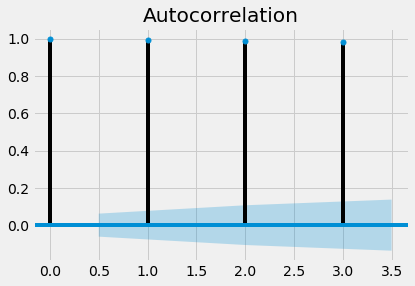

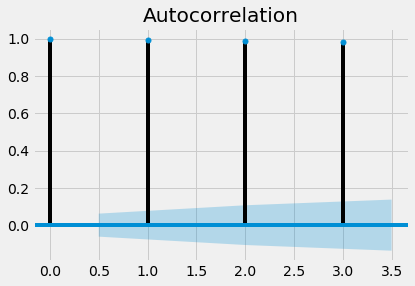

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.SPX_shift_3,lags=3)
plt.show()

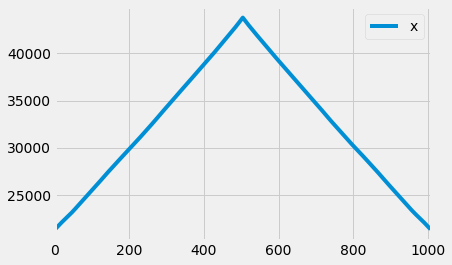

In [0]:
x =scipy.signal.correlate(df.SPX,df.SPX_shift_3,mode='same')/len(df.SPX) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.correlate.html

x=pd.DataFrame({'x':x})
x.plot()

In [0]:

# DGLD = yf.download('DGLD',"1990-1-1").drop(columns=['Open','High', 'Low','Adj Close','Volume'])

# DGLD['MA'] = DGLD.rolling(180).sum()/180
# DGLD.plot(figsize=(18,6))